<a href="https://colab.research.google.com/github/haleywis/OPTI556/blob/main/HW2_Wiskoski_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OPTI-556: Computational Imaging**  
# Haley Wiskoski  
Homework #2   
Due: Tuesday September 23rd, 2021

## Libraries

In [ ]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from scipy.signal import convolve2d, convolve
from skimage.restoration import denoise_tv_chambolle
from skimage import color, data, restoration, exposure, filters
from skimage import io
from google.colab import files
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams.update({'font.size': 16})

## Image Debluring and Denoising


### Comparing Deblurring
Images reconstructed with three algorithms: Wiener, EM, and total variation. This portion will explore how well the reconstructions do for various blur levels, but a constant level of added noise. 

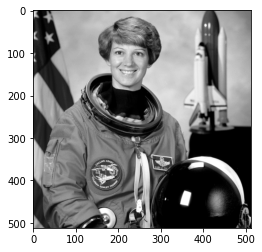

In [ ]:
# uploading our image 
img = color.rgb2gray(data.astronaut())
# visually testing our output
plt.imshow(img) 

In [ ]:
# First Gaussian PSF
snr = 10
xrange=np.linspace(-3,3,32)
x,y=np.meshgrid(xrange,xrange)
psf = np.exp(-(x**2+y**2))
psf = psf/np.sum(np.sum(psf))

# Get our measured object by convolving the PSF with our image
img_meas = convolve2d(img, psf, 'same')

# Adding Gaussian noise 
img_meas += img.std() * np.random.standard_normal(img.shape)/snr

# Obtaining the restored image using the Weiner filter
final = restoration.wiener(img_meas, psf, 1/snr)
EMfinal = restoration.richardson_lucy(img_meas, psf, iterations = 30)
TVfinal = denoise_tv_chambolle(img_meas, weight = 0.2)

#-------------------------------------------------------
# Using a second Gaussian PSF of different blur width
psf2 = np.exp(-(0.5*x**2+0.5*y**2))
psf2 = psf2/np.sum(np.sum(psf2))

img_meas2 = convolve2d(img, psf2, 'same')
img_meas2 += img.std() * np.random.standard_normal(img.shape)/snr
final2 = restoration.wiener(img_meas2, psf2, 1/snr)
EMfinal2 = restoration.richardson_lucy(img_meas2, psf2, iterations = 50)
TVfinal2 = denoise_tv_chambolle(img_meas2, weight = 0.2)

#-------------------------------------------------------
# Third Gaussian PSF of larger blur width
psf3 = np.exp(-(0.25*x**2+0.25*y**2))
psf3 = psf3/np.sum(np.sum(psf3))

img_meas3 = convolve2d(img, psf3, 'same')
img_meas3 += img.std() * np.random.standard_normal(img.shape)/snr
final3 = restoration.wiener(img_meas3, psf3, 1/snr)
EMfinal3 = restoration.richardson_lucy(img_meas3, psf3, iterations = 70)
TVfinal3 = denoise_tv_chambolle(img_meas3, weight = 0.2)

#### Wiener

MSE of first Wiener reconstruction: 0.009193048039360706
MSE of second Wiener reconstruction: 0.009710060893908978
MSE of third Wiener reconstruction: 0.011954835810951471


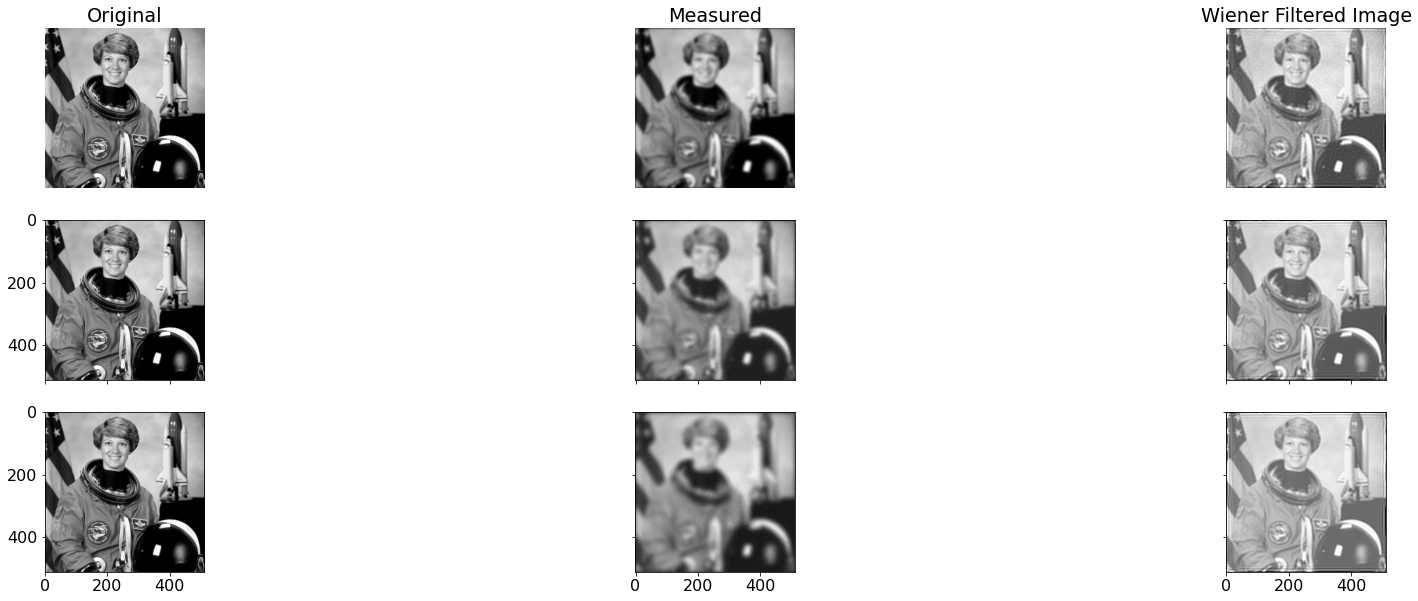

In [128]:
# Results from Wiener Reconstruction

# Calculating Mean Square Error between the original and reconstructed images
Y1 = np.square(np.subtract(img,final)).mean()
print("MSE of first Wiener reconstruction:", Y1)
Y2 = np.square(np.subtract(img,final2)).mean()
print("MSE of second Wiener reconstruction:", Y2)
Y3 = np.square(np.subtract(img,final3)).mean()
print("MSE of third Wiener reconstruction:", Y3)

#-------------------------------------------------------
# Plotting results from Wiener Reconstruction
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(30, 10),
                       sharex=True, sharey=True)
plt.gray()
ax[0,0].imshow(img)
ax[0,0].axis('off')
ax[0,0].set_title('Original')
ax[0,1].imshow(img_meas)
ax[0,1].axis('off')
ax[0,1].set_title('Measured')
ax[0,2].imshow(final)
ax[0,2].axis('off')
ax[0,2].set_title('Wiener Filtered Image')
ax[1,0].imshow(img)
ax[1,1].imshow(img_meas2)
ax[1,2].imshow(final2)
ax[2,0].imshow(img)
ax[2,1].imshow(img_meas3)
ax[2,2].imshow(final3)

#### Expectation Maximization

MSE of first EM reconstruction: 0.029598723736081037
MSE of second EM reconstruction: 0.04889775112978295
MSE of third EM reconstruction: 0.06711314460445772


Text(0.5, 1.0, 'EM Filtered Image 3')

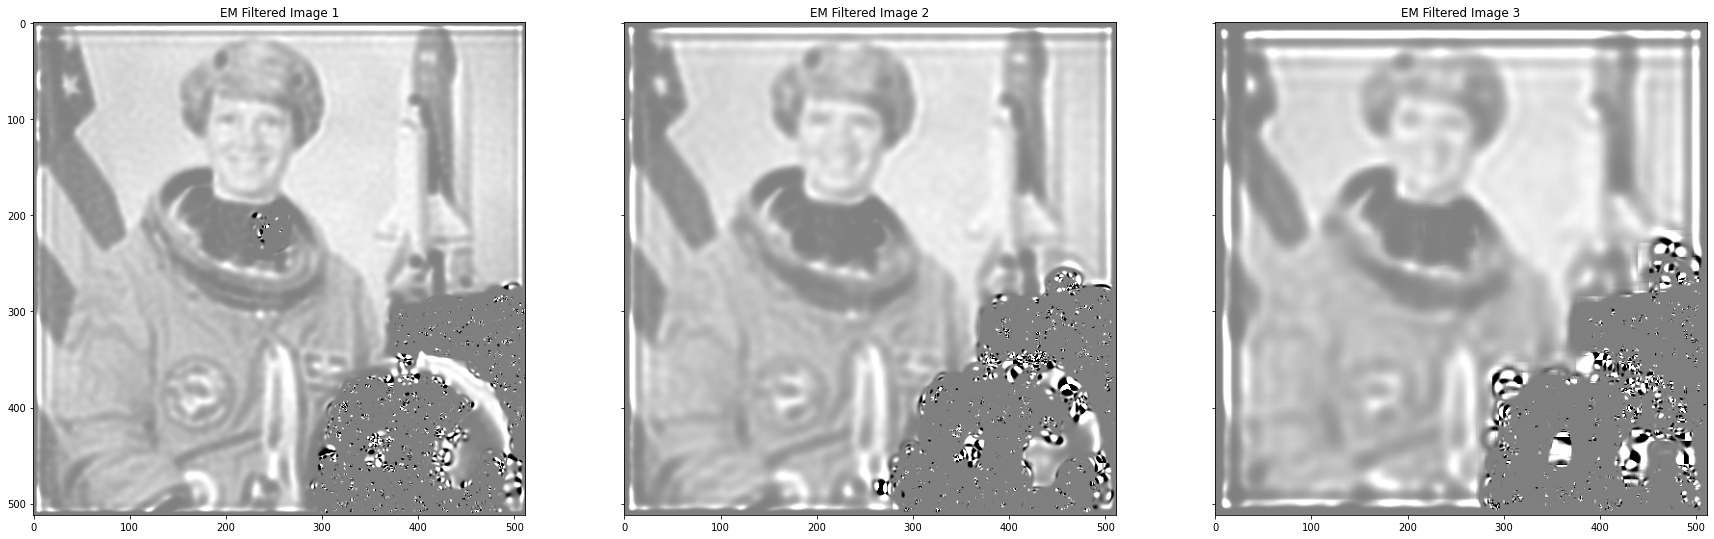

In [ ]:
# Results of Expectation Maximization reconstruction

# Calculating Mean Square Error between the original and reconstructed images
Y1 = np.square(np.subtract(img,EMfinal)).mean()
print("MSE of first EM reconstruction:", Y1)
Y2 = np.square(np.subtract(img,EMfinal2)).mean()
print("MSE of second EM reconstruction:", Y2)
Y3 = np.square(np.subtract(img,EMfinal3)).mean()
print("MSE of third EM reconstruction:", Y3)

#-------------------------------------------------------
# Plotting results from EM Reconstruction
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 10),
                       sharex=True, sharey=True)
plt.gray()

ax[0].imshow(EMfinal)
ax[0].set_title('EM Filtered Image 1')
ax[1].imshow(EMfinal2)
ax[1].set_title('EM Filtered Image 2')
ax[2].imshow(EMfinal3)
ax[2].set_title('EM Filtered Image 3')

#### Total Variation

MSE of first TV Restoration: 0.008984885661349981
MSE of second TV Restoration: 0.01200816651642785
MSE of third TV Restoration: 0.01554741519634123


Text(0.5, 1.0, 'TV Filtered Image 3')

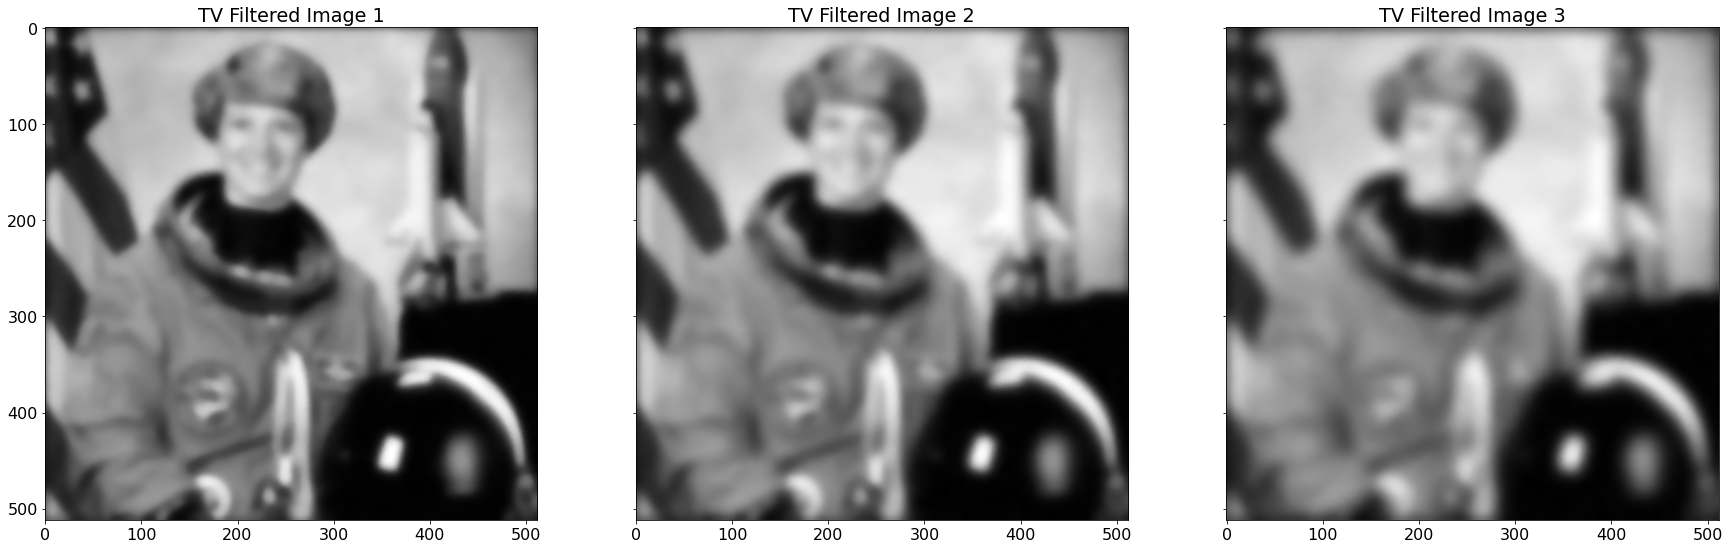

In [ ]:
# Results from Total Variation Restoration 

# Calculating Mean Square Error between the original and reconstructed images
Y1 = np.square(np.subtract(img,TVfinal)).mean()
print("MSE of first TV Restoration:", Y1)
Y2 = np.square(np.subtract(img,TVfinal2)).mean()
print("MSE of second TV Restoration:", Y2)
Y3 = np.square(np.subtract(img,TVfinal3)).mean()
print("MSE of third TV Restoration:", Y3)

#-------------------------------------------------------
# Plotting results from TV Reconstruction
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 10),
                       sharex=True, sharey=True)
plt.gray()
ax[0].imshow(TVfinal)
ax[0].set_title('TV Filtered Image 1')
ax[1].imshow(TVfinal2)
ax[1].set_title('TV Filtered Image 2')
ax[2].imshow(TVfinal3)
ax[2].set_title('TV Filtered Image 3')

Text(0.5, 1.0, 'Gaussian PSF 3')

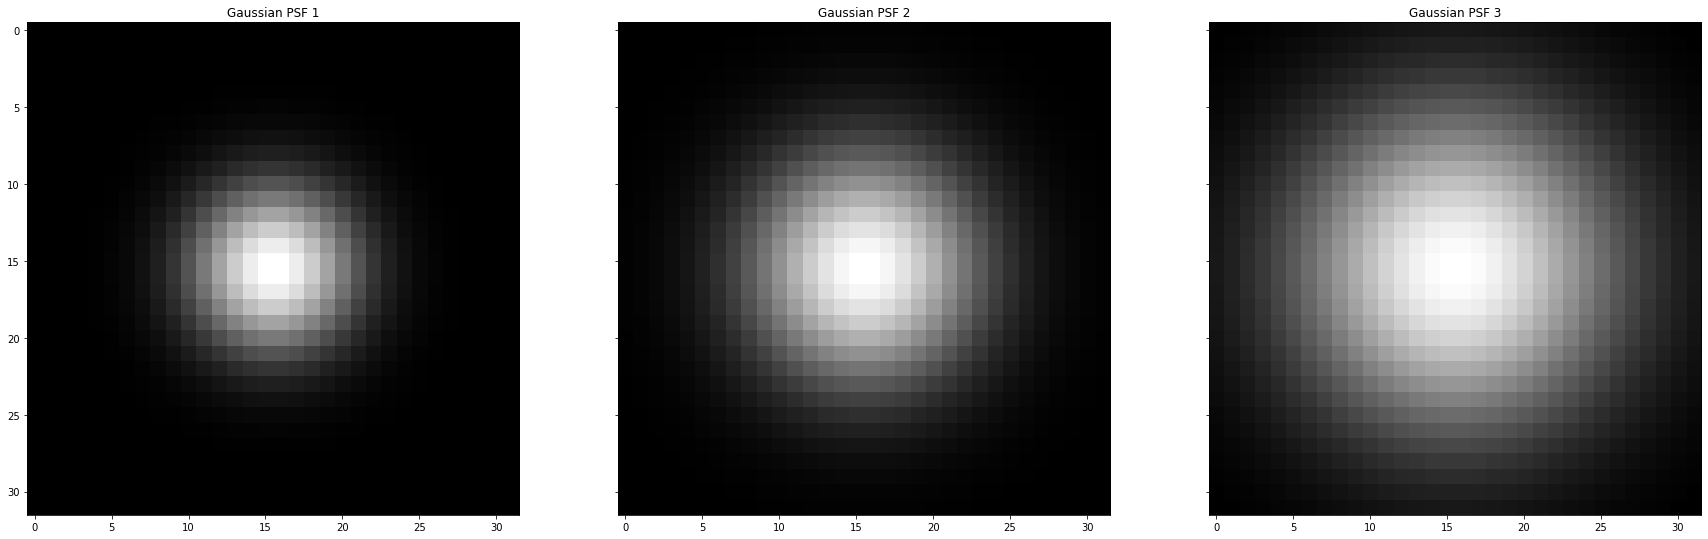

In [ ]:
# Here are the three PSFs used above
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 10),
                       sharex=True, sharey=True)
ax[0].imshow(psf)
ax[0].set_title('Gaussian PSF 1')
ax[1].imshow(psf2)
ax[1].set_title('Gaussian PSF 2')
ax[2].imshow(psf3)
ax[2].set_title('Gaussian PSF 3')

### Comparing Denoising
In this portion we will apply various levels of Poisson noise to the image and compare the restoration abilities of each algorithm. The same Gaussian blurring PSF will be applied to each image to create the "measured" data.

In [90]:
# Same process as above, but using Poisson noise instead of Gaussian

# Poisson noise with signal level = 100
signal = 100
snr = signal / np.sqrt(signal)
img_meas = convolve2d(img, psf, 'same')
noise_mask= img_meas.std() * np.random.poisson(1, img.shape)/snr
img_noisy = img_meas + noise_mask
final = restoration.wiener(img_noisy, psf, 1/snr)
EMfinal = restoration.richardson_lucy(img_noisy, psf, iterations = 30)
TVfinal = denoise_tv_chambolle(img_noisy, weight = 0.2)

# Poisson noise with signal level = 1000
signal = 1000
snr = signal / np.sqrt(signal)
img_meas = convolve2d(img, psf, 'same')
noise_mask= img_meas.std() * np.random.poisson(1, img.shape)/snr
img_noisy2 = img_meas + noise_mask
final2 = restoration.wiener(img_noisy2, psf, 1/snr)
EMfinal2 = restoration.richardson_lucy(img_noisy2, psf, iterations = 30)
TVfinal2 = denoise_tv_chambolle(img_noisy2, weight = 0.2)

# Poisson noise with signal level = 10000
signal = 10000
snr = signal / np.sqrt(signal)
img_meas = convolve2d(img, psf, 'same')
noise_mask= img_meas.std() * np.random.poisson(1, img.shape)/snr
img_noisy3 = img_meas + noise_mask
final3 = restoration.wiener(img_noisy3, psf, 1/snr)
EMfinal3 = restoration.richardson_lucy(img_noisy3, psf, iterations = 30)
TVfinal3 = denoise_tv_chambolle(img_noisy3, weight = 0.2)

#-------------------------------------------------------


#### Wiener

MSE of first Wiener reconstruction (lower SNR): 0.009236316676254276
MSE of second Wiener reconstruction (higher SNR): 0.009726565946871575
MSE of third Wiener reconstruction (highest SNR): 0.011954552050031403


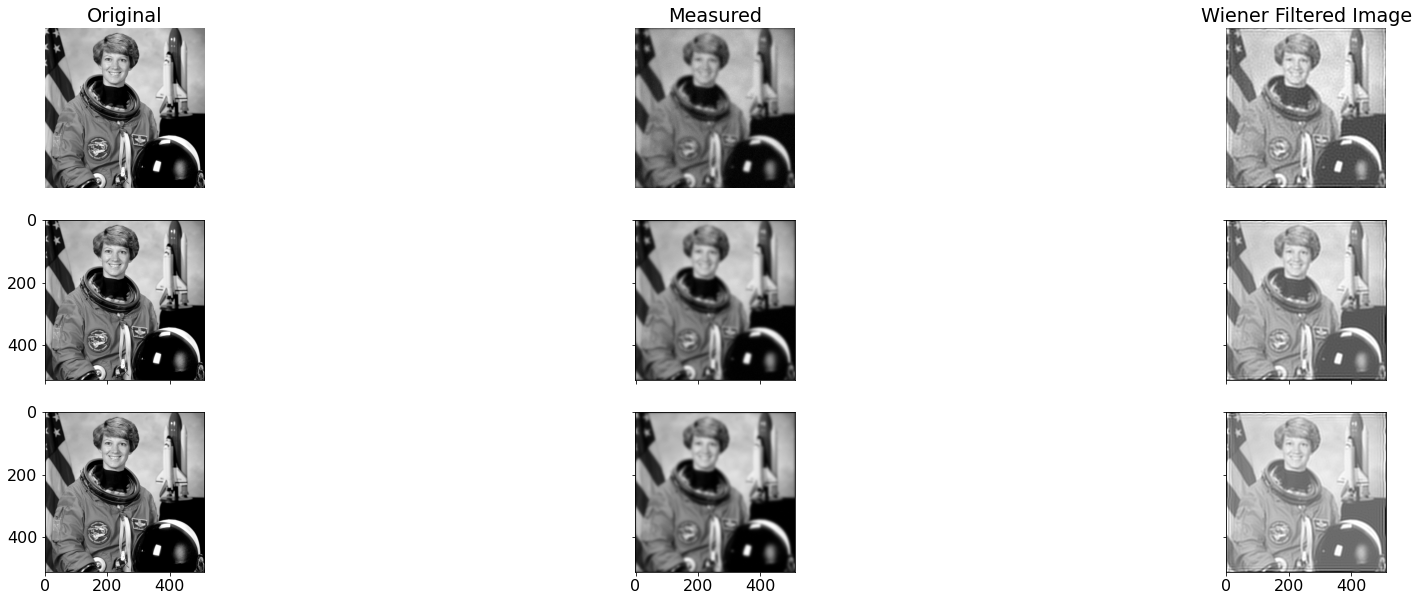

In [83]:
# Results of Wiener Reconstruction 

# Calculating Mean Square Error between the original and reconstructed images
Y1 = np.square(np.subtract(img,final)).mean()
print("MSE of first Wiener reconstruction (lower SNR):", Y1)
Y2 = np.square(np.subtract(img,final2)).mean()
print("MSE of second Wiener reconstruction (higher SNR):", Y2)
Y3 = np.square(np.subtract(img,final3)).mean()
print("MSE of third Wiener reconstruction (highest SNR):", Y3)

#-------------------------------------------------------
# Plotting results
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(30, 10),
                       sharex=True, sharey=True)
plt.gray()
ax[0,0].imshow(img)
ax[0,0].axis('off')
ax[0,0].set_title('Original')
ax[0,1].imshow(img_noisy)
ax[0,1].axis('off')
ax[0,1].set_title('Measured')
ax[0,2].imshow(final)
ax[0,2].axis('off')
ax[0,2].set_title('Wiener Filtered Image')
ax[1,0].imshow(img)
ax[1,1].imshow(img_noisy2)
ax[1,2].imshow(final2)
ax[2,0].imshow(img)
ax[2,1].imshow(img_noisy3)
ax[2,2].imshow(final3)

#### Expectation Maximization



MSE of first EM reconstruction: 0.013211788790282227
MSE of second EM reconstruction: 0.012385482440945178
MSE of third EM reconstruction: 0.012280630441654944


Text(0.5, 1.0, 'EM Filtered Image 3')

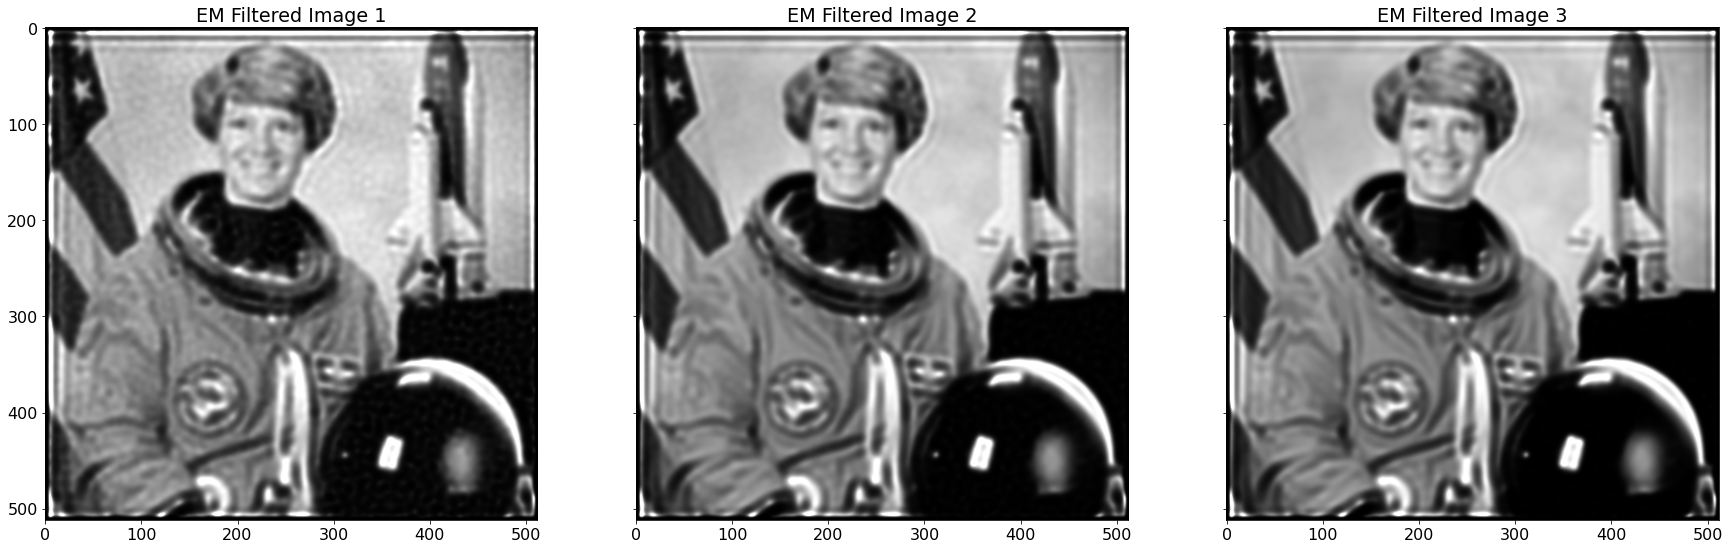

In [88]:
# Results of Expectation Maximization reconstruction

# Calculating Mean Square Error between the original and reconstructed images
Y1 = np.square(np.subtract(img,EMfinal)).mean()
print("MSE of first EM reconstruction:", Y1)
Y2 = np.square(np.subtract(img,EMfinal2)).mean()
print("MSE of second EM reconstruction:", Y2)
Y3 = np.square(np.subtract(img,EMfinal3)).mean()
print("MSE of third EM reconstruction:", Y3)

#-------------------------------------------------------
# Plotting results from EM Reconstruction
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 10),
                       sharex=True, sharey=True)
plt.gray()

ax[0].imshow(EMfinal)
ax[0].set_title('EM Filtered Image 1')
ax[1].imshow(EMfinal2)
ax[1].set_title('EM Filtered Image 2')
ax[2].imshow(EMfinal3)
ax[2].set_title('EM Filtered Image 3')

#### Total Variation

MSE of first TV Restoration: 0.009483900162871909
MSE of second TV Restoration: 0.009020633143435272
MSE of third TV Restoration: 0.008945291174156213


Text(0.5, 1.0, 'TV Filtered Image 3')

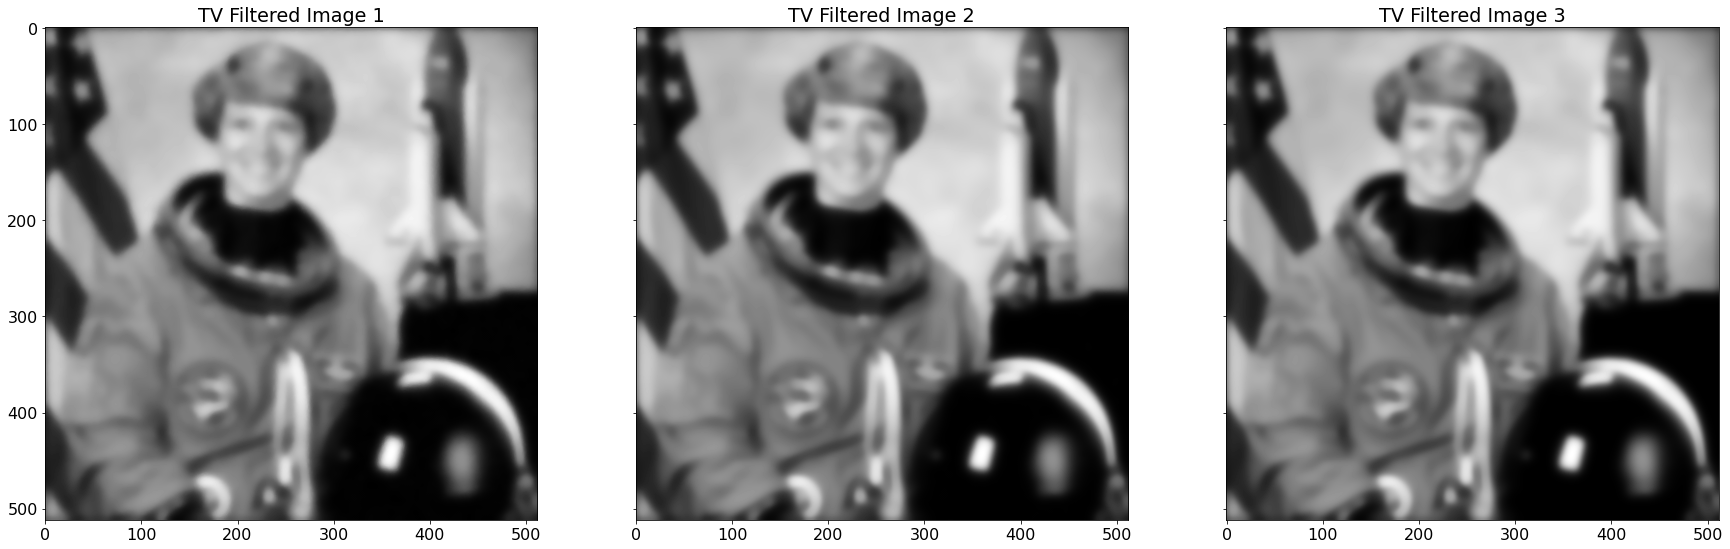

In [91]:
# Results from Total Variation Restoration 

# Calculating Mean Square Error between the original and reconstructed images
Y1 = np.square(np.subtract(img,TVfinal)).mean()
print("MSE of first TV Restoration:", Y1)
Y2 = np.square(np.subtract(img,TVfinal2)).mean()
print("MSE of second TV Restoration:", Y2)
Y3 = np.square(np.subtract(img,TVfinal3)).mean()
print("MSE of third TV Restoration:", Y3)

#-------------------------------------------------------
# Plotting results from TV Reconstruction
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 10),
                       sharex=True, sharey=True)
plt.gray()
ax[0].imshow(TVfinal)
ax[0].set_title('TV Filtered Image 1')
ax[1].imshow(TVfinal2)
ax[1].set_title('TV Filtered Image 2')
ax[2].imshow(TVfinal3)
ax[2].set_title('TV Filtered Image 3')

### Discussion

## Regression Algorithms

### Installation of Chianti Database

In [92]:
!wget https://download.chiantidatabase.org/CHIANTI_10.0.1_database.tar.gz
!mkdir dbase
!tar xvf CHIANTI_10.0.1_database.tar.gz -C dbase/

--2021-09-28 06:07:38--  https://download.chiantidatabase.org/CHIANTI_10.0.1_database.tar.gz
Resolving download.chiantidatabase.org (download.chiantidatabase.org)... 70.32.23.63
Connecting to download.chiantidatabase.org (download.chiantidatabase.org)|70.32.23.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 888202017 (847M) [application/x-gzip]
Saving to: ‘CHIANTI_10.0.1_database.tar.gz’

CHIANTI_10.0.1_data 100%[===================>] 847.05M  30.0MB/s    in 29s     

2021-09-28 06:08:07 (29.0 MB/s) - ‘CHIANTI_10.0.1_database.tar.gz’ saved [888202017/888202017]

README_CHIANTI
VERSION
abundance/
abundance/sun_coronal_2012_schmelz_ext.abund
abundance/cosmic_1973_allen.abund
abundance/sun_photospheric_2011_caffau.abund
abundance/sun_photospheric_2015_scott.abund
abundance/unity.abund
abundance/sun_coronal_1999_fludra_ext.abund
abundance/sun_photospheric_1998_grevesse.abund
abundance/sun_coronal_1992_feldman_ext.abund
abundance/sun_coronal_1999_fludra.abund
ab

In [94]:
!pip3 install ChiantiPy
!pip3 install ipyparallel
%env XUVTOP=/content/dbase/
import ChiantiPy.core as ch

     |████████████████████████████████| 189 kB 13.7 MB/s 
     |████████████████████████████████| 384 kB 14.6 MB/s 
env: XUVTOP=/content/dbase/
 ChiantiPy version 0.11.0 
 using cli
 using CLI for selections


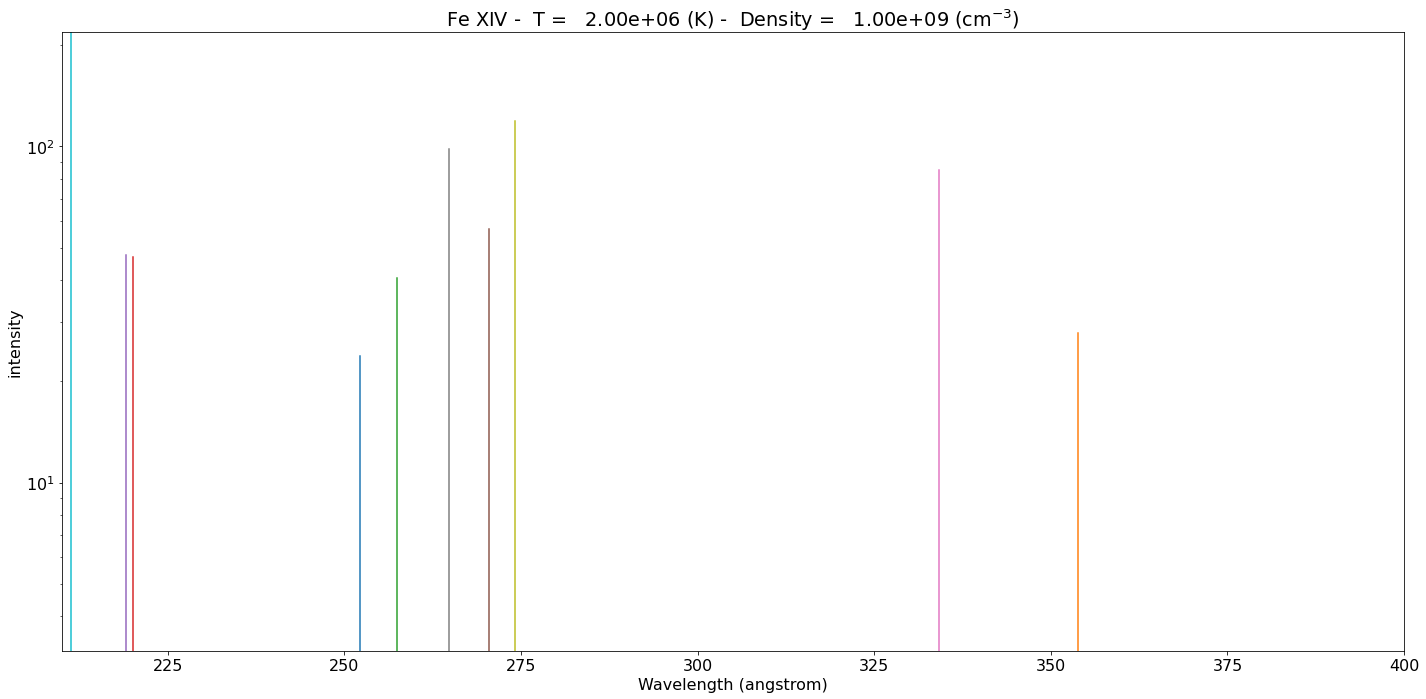

In [95]:
t=2000000
fe14 = ch.ion('fe_14', temperature=t, eDensity=1.e+9, em=1.e+27)
fe14.intensityPlot(wvlRange=[210.,400.],linLog='log')
wvl = np.linspace(100,400,1024)
fe14.spectrum(wvl)

### Random Measurement Matrix
In this exercise, we will apply a random full rank H matrix to a spectra from the Chianti database. Various levels of noise will be added, and we will observe the ability of several regression algorithms to recover the original signal. 

Text(0.5, 1.0, 'Estimated spectrum')

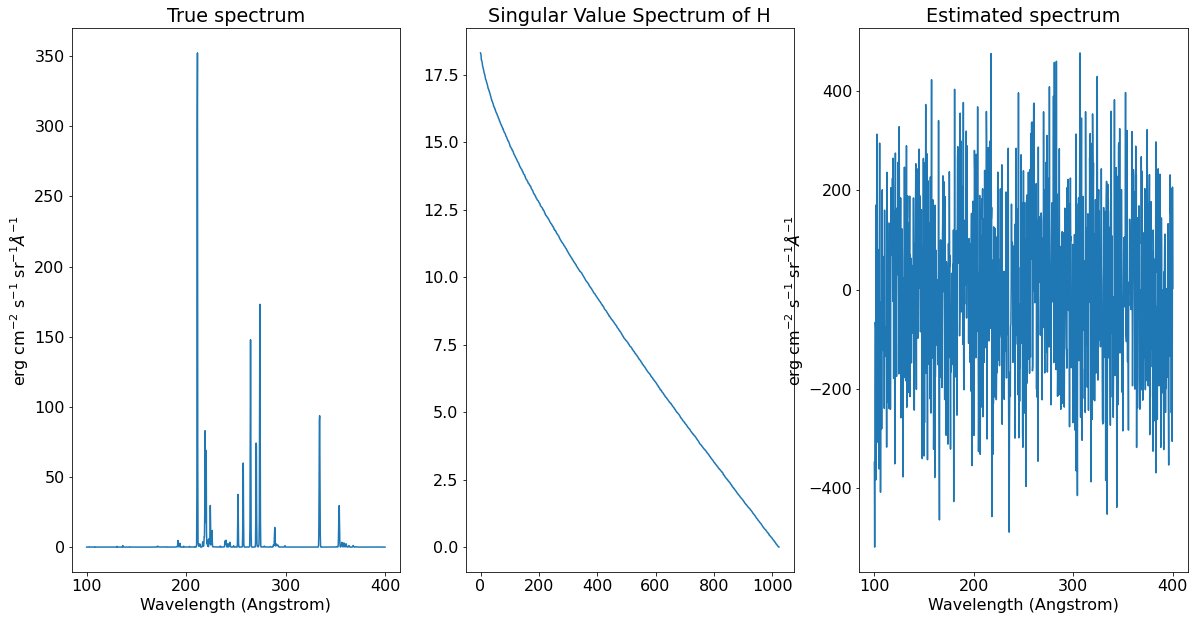

In [110]:
# Initializing our full rank, random matrix with additive Gaussian noise

# Noise Level = 1 ---------------------------------------------
R=1024
noiseLevel = 1
H=np.random.random((R,1024))-.5
u, lam, vh = np.linalg.svd(H)
fe=np.matmul(H,fe14.Spectrum['intensity'])+noiseLevel*np.random.normal(scale=1,size=(1024))

# Noise Level = 3 ---------------------------------------------
noiseLevel = 3
fe2=np.matmul(H,fe14.Spectrum['intensity'])+noiseLevel*np.random.normal(scale=1,size=(1024))

# Noise Level = 5 ---------------------------------------------
noiseLevel = 5
fe3=np.matmul(H,fe14.Spectrum['intensity'])+noiseLevel*np.random.normal(scale=1,size=(1024))

# Noise Level = 10 ---------------------------------------------
#noiseLevel = 10
#fe2=np.linalg.lstsq(H, np.matmul(H,fe14.Spectrum['intensity'])+noiseLevel*np.random.normal(scale=1,size=(1024)))[0]

plt.subplot(1,3,1)
plt.plot(wvl,fe14.Spectrum['intensity'])
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('True spectrum')
plt.subplot(1,3,2)
plt.plot(lam)
plt.title('Singular Value Spectrum of H')
plt.subplot(1,3,3)
plt.plot(wvl,fe)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('Estimated spectrum')


In [112]:
# Applying the four regression algorithms

# Ordinary Least Squares
OLS1=np.linalg.lstsq(H,fe)[0]
OLS2=np.linalg.lstsq(H,fe2)[0]
OLS3=np.linalg.lstsq(H,fe3)[0]

# 900 Element tSVD
reduceRank=900
Hr=np.matmul(np.matmul(np.transpose(vh[0:reduceRank,:]),np.diag(1./lam[0:reduceRank])),np.transpose(u[:,0:reduceRank]))
tSVD1=np.matmul(Hr, fe)
tSVD2=np.matmul(Hr, fe2)
tSVD3=np.matmul(Hr, fe3)

# Tikhonov
lpam=1
Tik1=np.matmul(np.matmul(np.linalg.pinv(np.matmul(np.transpose(H),H)+lpam**2*np.eye(1024)),np.transpose(H)), fe)
Tik2=np.matmul(np.matmul(np.linalg.pinv(np.matmul(np.transpose(H),H)+lpam**2*np.eye(1024)),np.transpose(H)), fe2)
Tik3=np.matmul(np.matmul(np.linalg.pinv(np.matmul(np.transpose(H),H)+lpam**2*np.eye(1024)),np.transpose(H)), fe3)

# LASSO
from sklearn import linear_model
model = linear_model.Lasso(alpha=0.1)
model.fit(H,fe)
LASSO1=model.coef_
model.fit(H,fe2)
LASSO2=model.coef_
model.fit(H,fe3)
LASSO3=model.coef_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning

Text(0.5, 1.0, 'LASSO (noiseLevel = 1)')

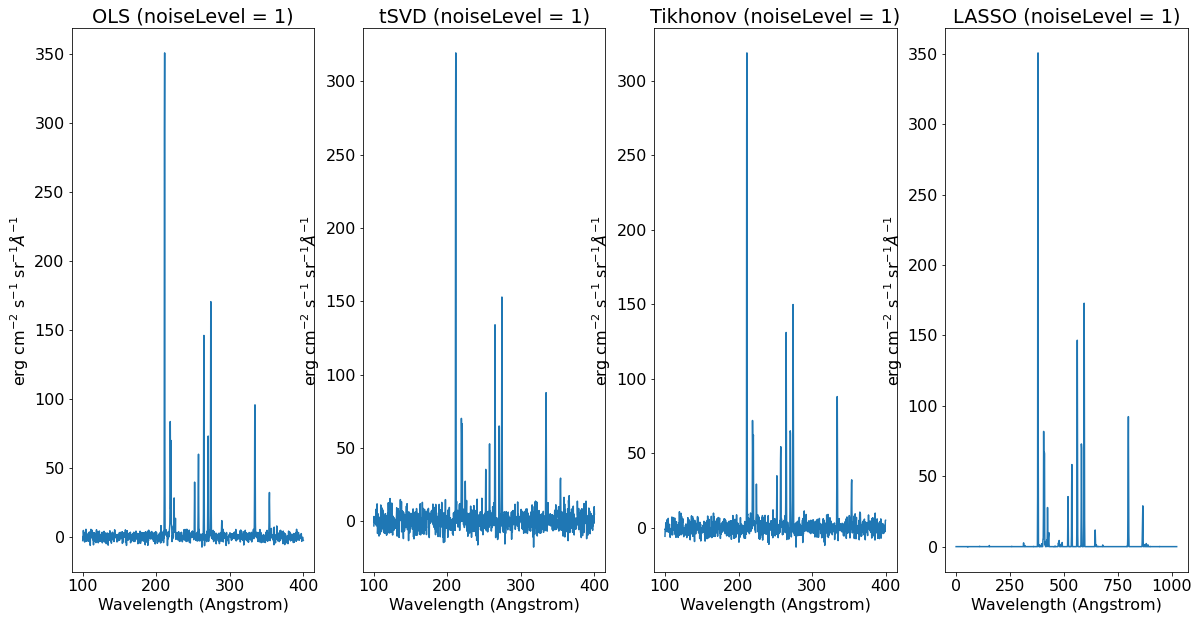

In [113]:
# Plotting the results
# Noise Level = 1
plt.subplot(1,4,1)
plt.plot(wvl,OLS1)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('OLS (noiseLevel = 1)')
plt.subplot(1,4,2)
plt.plot(wvl,tSVD1)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('tSVD (noiseLevel = 1)')
plt.subplot(1,4,3)
plt.plot(wvl,Tik1)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('Tikhonov (noiseLevel = 1)')
plt.subplot(1,4,4)
plt.plot(LASSO1)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('LASSO (noiseLevel = 1)')

Text(0.5, 1.0, 'LASSO (noiseLevel = 3)')

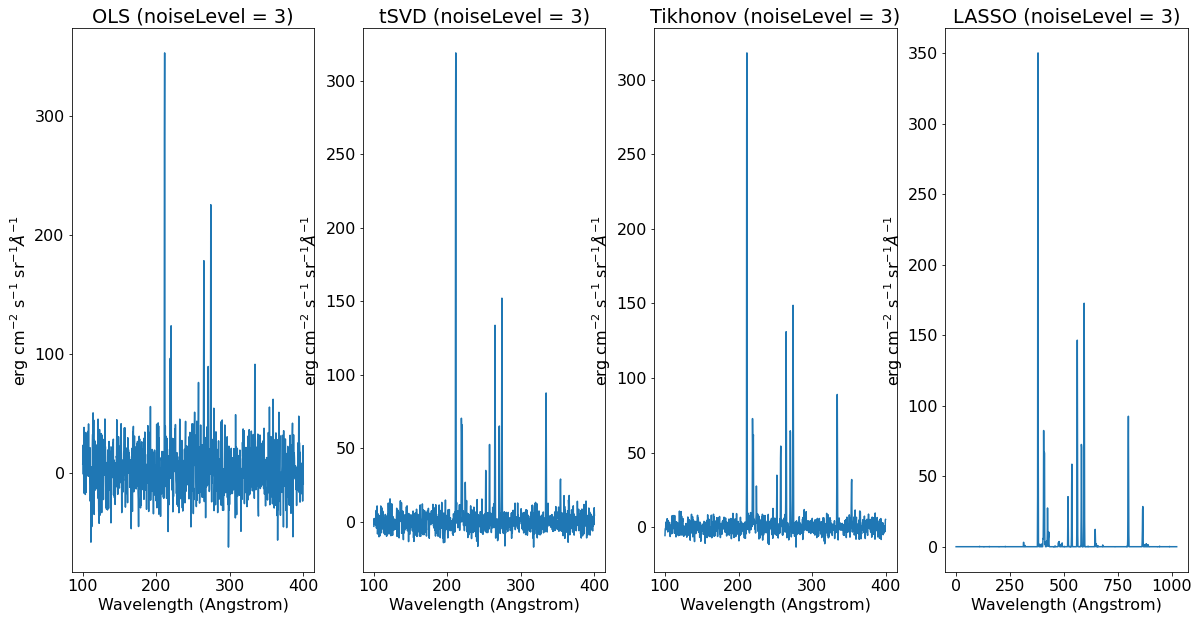

In [114]:
# Noise Level = 3
plt.subplot(1,4,1)
plt.plot(wvl,OLS2)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('OLS (noiseLevel = 3)')
plt.subplot(1,4,2)
plt.plot(wvl,tSVD2)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('tSVD (noiseLevel = 3)')
plt.subplot(1,4,3)
plt.plot(wvl,Tik2)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('Tikhonov (noiseLevel = 3)')
plt.subplot(1,4,4)
plt.plot(LASSO2)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('LASSO (noiseLevel = 3)')

Text(0.5, 1.0, 'LASSO (noiseLevel = 5)')

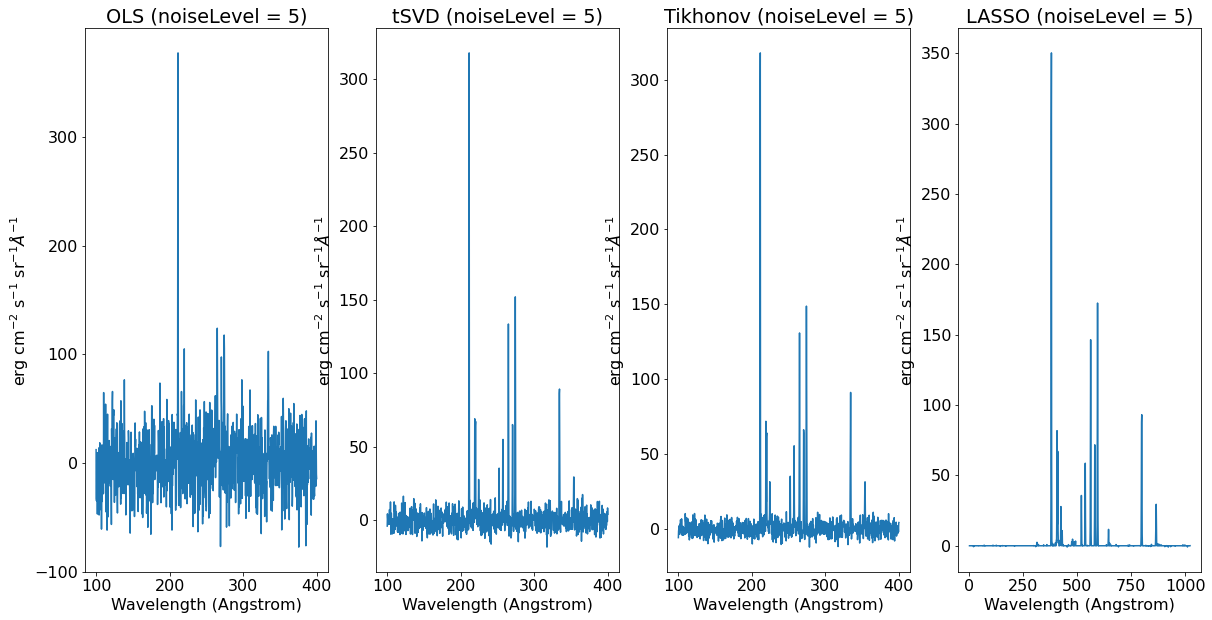

In [115]:
# Noise Level = 5
plt.subplot(1,4,1)
plt.plot(wvl,OLS3)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('OLS (noiseLevel = 5)')
plt.subplot(1,4,2)
plt.plot(wvl,tSVD3)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('tSVD (noiseLevel = 5)')
plt.subplot(1,4,3)
plt.plot(wvl,Tik3)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('Tikhonov (noiseLevel = 5)')
plt.subplot(1,4,4)
plt.plot(LASSO3)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('LASSO (noiseLevel = 5)')

### Hadamard Matrix
In this portion, we will apply the Hadamard matrix to the spectrum, and observe two levels of noise (noise level = 1 and = 10). We will then observe the ability of the four algorithms to recover the original spectrum. 

Text(0.5, 1.0, 'Estimated spectrum')

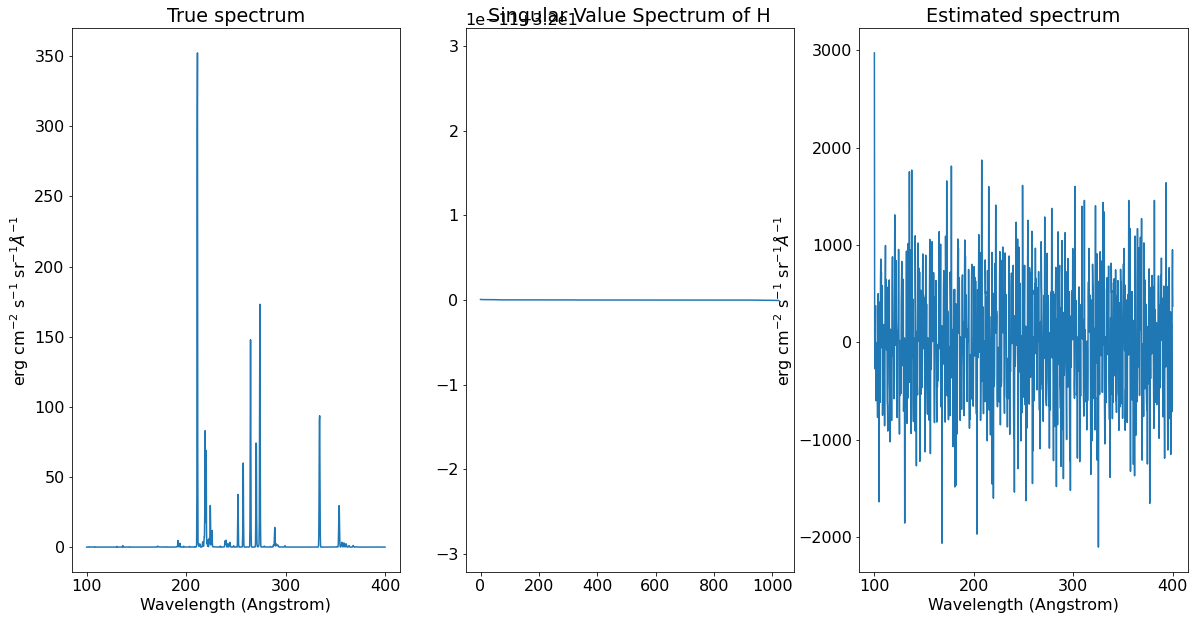

In [118]:
# First we apply the Hadamard matrix to the spectra
from scipy.linalg import hadamard
R=1024
noiseLevel = 1
H = hadamard(R)
u, lam, vh = np.linalg.svd(H)
fe=np.matmul(H,fe14.Spectrum['intensity'])+noiseLevel*np.random.normal(scale=1,size=(1024))

noiseLevel = 10
fe2=np.matmul(H,fe14.Spectrum['intensity'])+noiseLevel*np.random.normal(scale=1,size=(1024))

# Plotting initial spectra and H matrix
plt.subplot(1,3,1)
plt.plot(wvl,fe14.Spectrum['intensity'])
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('True spectrum')
plt.subplot(1,3,2)
plt.plot(lam)
plt.title('Singular Value Spectrum of H')
plt.subplot(1,3,3)
plt.plot(wvl,fe)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('Estimated spectrum')

In [119]:
# Applying the four regression algorithms

# Ordinary Least Squares
OLS1=np.linalg.lstsq(H,fe)[0]
OLS2=np.linalg.lstsq(H,fe2)[0]
#OLS3=np.linalg.lstsq(H,fe3)[0]

# 900 Element tSVD
reduceRank=900
Hr=np.matmul(np.matmul(np.transpose(vh[0:reduceRank,:]),np.diag(1./lam[0:reduceRank])),np.transpose(u[:,0:reduceRank]))
tSVD1=np.matmul(Hr, fe)
tSVD2=np.matmul(Hr, fe2)
#tSVD3=np.matmul(Hr, fe3)

# Tikhonov
lpam=1
Tik1=np.matmul(np.matmul(np.linalg.pinv(np.matmul(np.transpose(H),H)+lpam**2*np.eye(1024)),np.transpose(H)), fe)
Tik2=np.matmul(np.matmul(np.linalg.pinv(np.matmul(np.transpose(H),H)+lpam**2*np.eye(1024)),np.transpose(H)), fe2)
#Tik3=np.matmul(np.matmul(np.linalg.pinv(np.matmul(np.transpose(H),H)+lpam**2*np.eye(1024)),np.transpose(H)), fe3)

# LASSO
from sklearn import linear_model
model = linear_model.Lasso(alpha=0.1)
model.fit(H,fe)
LASSO1=model.coef_
model.fit(H,fe2)
LASSO2=model.coef_
#model.fit(H,fe3)
#LASSO3=model.coef_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


Text(0.5, 1.0, 'LASSO (noiseLevel = 1)')

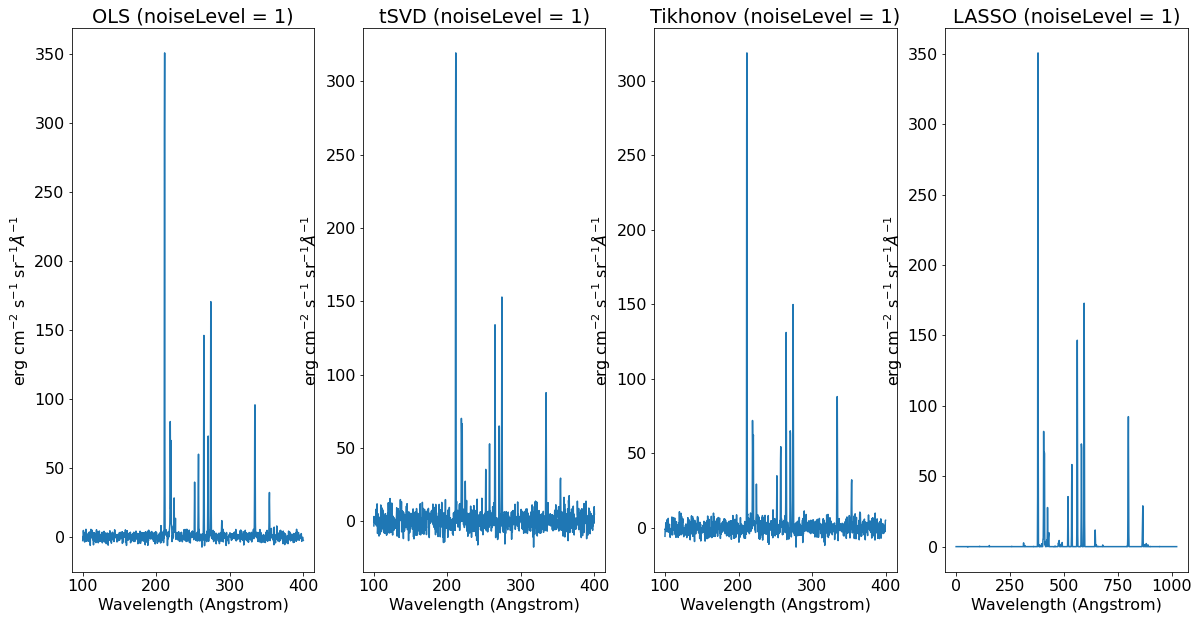

In [117]:
# Plotting the results
# Noise Level = 1
plt.subplot(1,4,1)
plt.plot(wvl,OLS1)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('OLS (noiseLevel = 1)')
plt.subplot(1,4,2)
plt.plot(wvl,tSVD1)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('tSVD (noiseLevel = 1)')
plt.subplot(1,4,3)
plt.plot(wvl,Tik1)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('Tikhonov (noiseLevel = 1)')
plt.subplot(1,4,4)
plt.plot(LASSO1)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('LASSO (noiseLevel = 1)')

Text(0.5, 1.0, 'LASSO (noiseLevel = 10)')

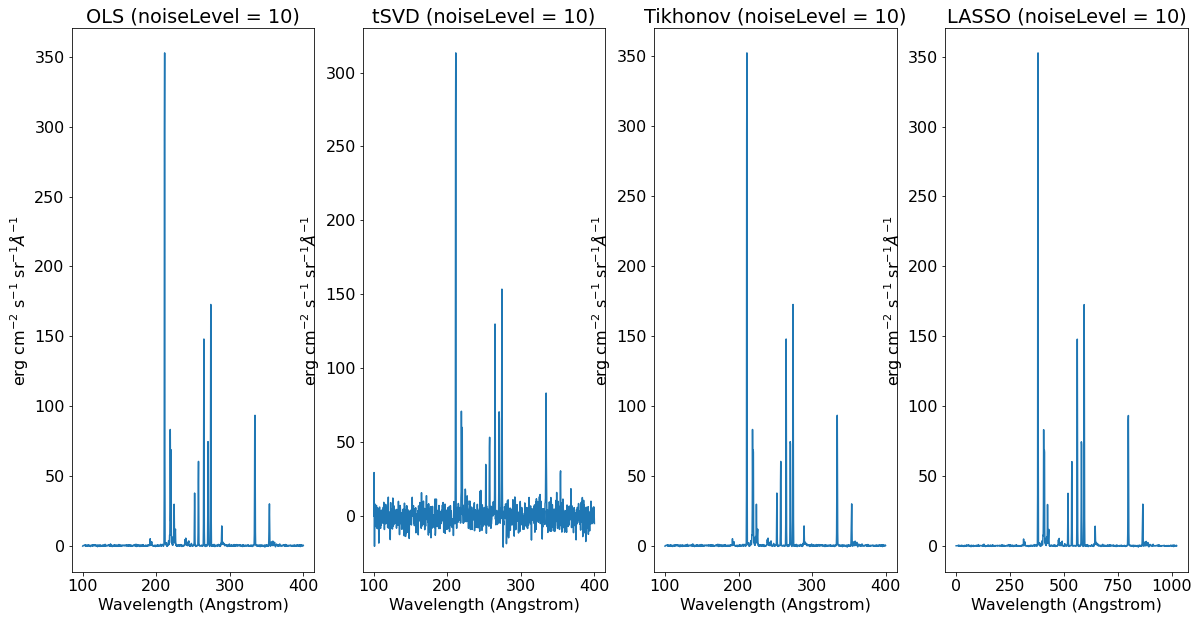

In [120]:
# Noise Level = 10
plt.subplot(1,4,1)
plt.plot(wvl,OLS2)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('OLS (noiseLevel = 10)')
plt.subplot(1,4,2)
plt.plot(wvl,tSVD2)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('tSVD (noiseLevel = 10)')
plt.subplot(1,4,3)
plt.plot(wvl,Tik2)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('Tikhonov (noiseLevel = 10)')
plt.subplot(1,4,4)
plt.plot(LASSO2)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('LASSO (noiseLevel = 10)')

### Downsampling Forward Model

Text(0.5, 1.0, 'Estimated spectrum')

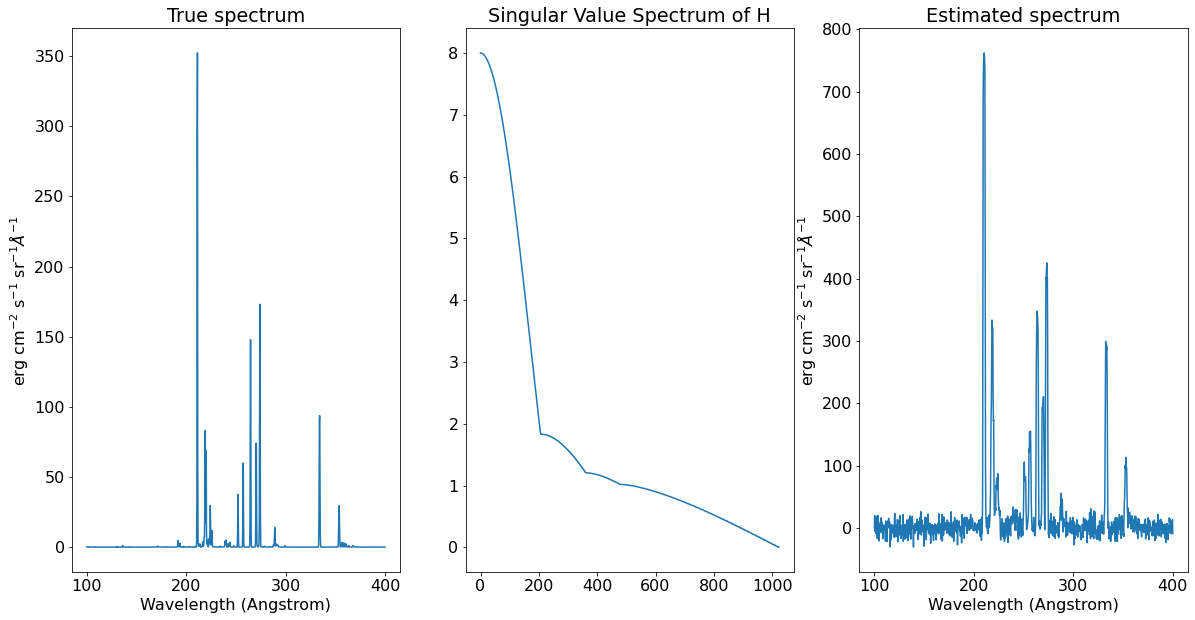

In [124]:
from scipy.linalg import toeplitz
psf=[1,1,1,1,1,1,1,1]
N=1024
firstRow=np.concatenate((psf,np.zeros(N-len(psf))))
firstColumn=np.zeros(N)
firstColumn[0]=1
H=toeplitz(firstColumn,firstRow)
u, s, vh=np.linalg.svd(H)
noiseLevel = 10
fe=np.matmul(H,fe14.Spectrum['intensity'])+noiseLevel*np.random.normal(scale=1,size=(1024))

noiseLevel = 20
fe2=np.matmul(H,fe14.Spectrum['intensity'])+noiseLevel*np.random.normal(scale=1,size=(1024))

# Plotting initial spectra and H matrix
plt.subplot(1,3,1)
plt.plot(wvl,fe14.Spectrum['intensity'])
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('True spectrum')
plt.subplot(1,3,2)
plt.plot(s)
plt.title('Singular Value Spectrum of H')
plt.subplot(1,3,3)
plt.plot(wvl,fe)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('Estimated spectrum')

In [125]:
# Applying the four regression algorithms

# Ordinary Least Squares
OLS1=np.linalg.lstsq(H,fe)[0]
OLS2=np.linalg.lstsq(H,fe2)[0]
#OLS3=np.linalg.lstsq(H,fe3)[0]

# 900 Element tSVD
reduceRank=900
Hr=np.matmul(np.matmul(np.transpose(vh[0:reduceRank,:]),np.diag(1./lam[0:reduceRank])),np.transpose(u[:,0:reduceRank]))
tSVD1=np.matmul(Hr, fe)
tSVD2=np.matmul(Hr, fe2)
#tSVD3=np.matmul(Hr, fe3)

# Tikhonov
lpam=1
Tik1=np.matmul(np.matmul(np.linalg.pinv(np.matmul(np.transpose(H),H)+lpam**2*np.eye(1024)),np.transpose(H)), fe)
Tik2=np.matmul(np.matmul(np.linalg.pinv(np.matmul(np.transpose(H),H)+lpam**2*np.eye(1024)),np.transpose(H)), fe2)
#Tik3=np.matmul(np.matmul(np.linalg.pinv(np.matmul(np.transpose(H),H)+lpam**2*np.eye(1024)),np.transpose(H)), fe3)

# LASSO
from sklearn import linear_model
model = linear_model.Lasso(alpha=0.1)
model.fit(H,fe)
LASSO1=model.coef_
model.fit(H,fe2)
LASSO2=model.coef_
#model.fit(H,fe3)
#LASSO3=model.coef_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


Text(0.5, 1.0, 'LASSO (noiseLevel = 1)')

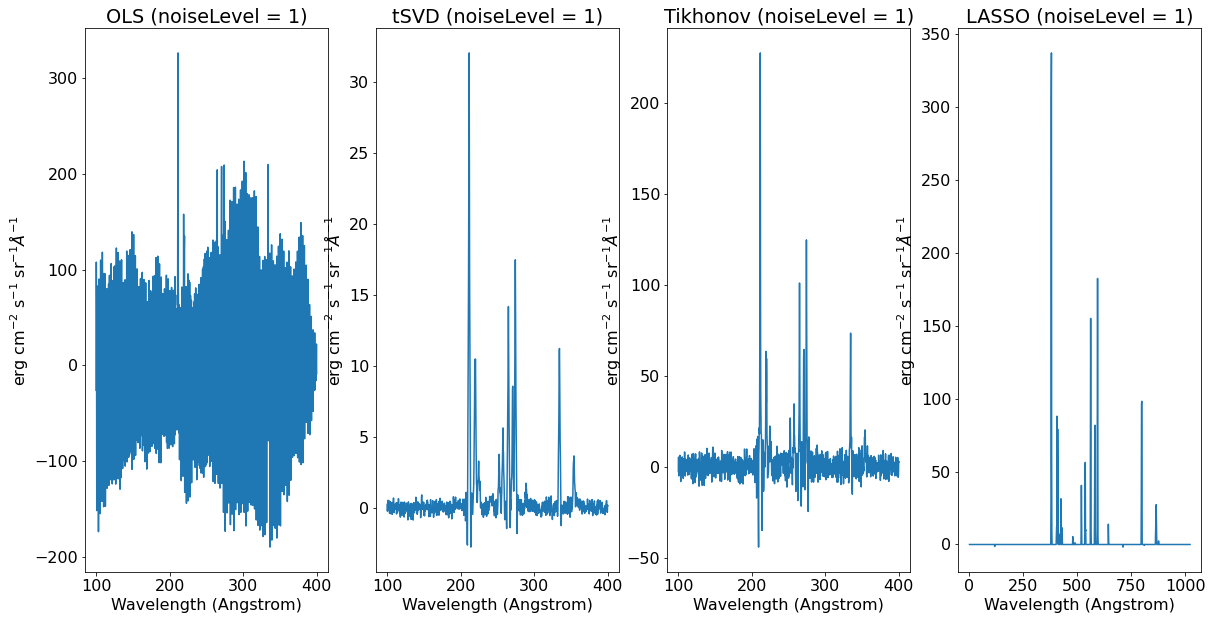

In [126]:
# Plotting the results
# Noise Level = 10
plt.subplot(1,4,1)
plt.plot(wvl,OLS1)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('OLS (noiseLevel = 10)')
plt.subplot(1,4,2)
plt.plot(wvl,tSVD1)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('tSVD (noiseLevel = 10)')
plt.subplot(1,4,3)
plt.plot(wvl,Tik1)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('Tikhonov (noiseLevel = 10)')
plt.subplot(1,4,4)
plt.plot(LASSO1)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('LASSO (noiseLevel = 10)')

Text(0.5, 1.0, 'LASSO (noiseLevel = 20)')

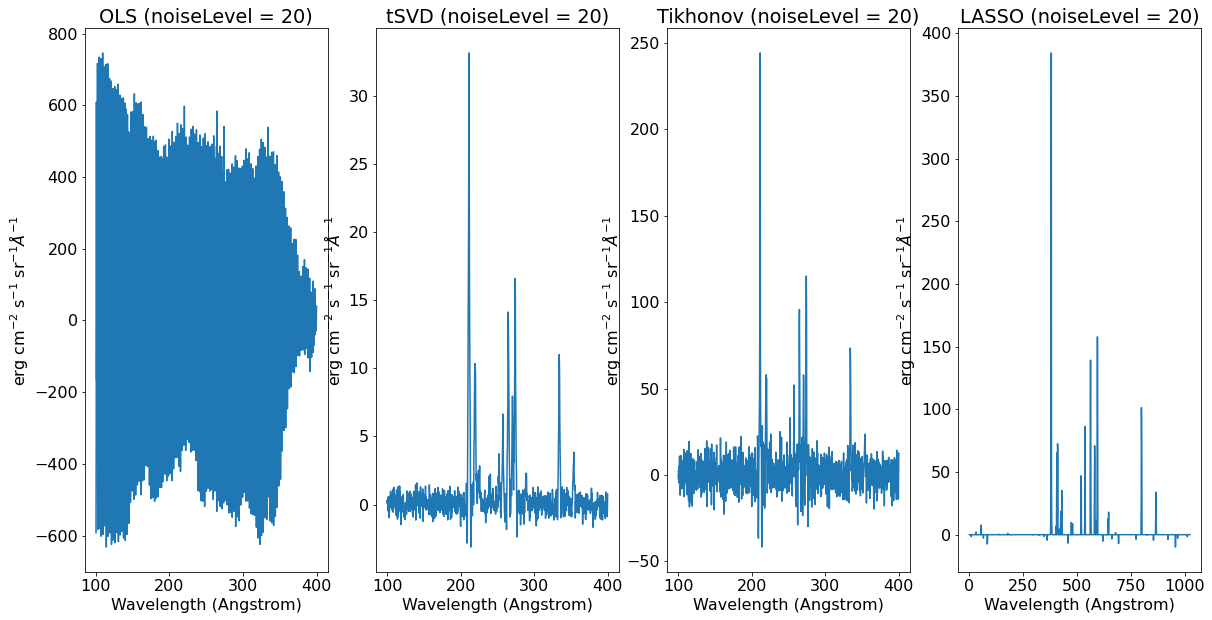

In [127]:
# Noise Level = 20
plt.subplot(1,4,1)
plt.plot(wvl,OLS2)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('OLS (noiseLevel = 20)')
plt.subplot(1,4,2)
plt.plot(wvl,tSVD2)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('tSVD (noiseLevel = 20)')
plt.subplot(1,4,3)
plt.plot(wvl,Tik2)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('Tikhonov (noiseLevel = 20)')
plt.subplot(1,4,4)
plt.plot(LASSO2)
plt.xlabel(fe14.Spectrum['xlabel'])
plt.ylabel(fe14.Spectrum['ylabel'])
plt.title('LASSO (noiseLevel = 20)')

### Discussion and Comparisons